### Import Libraries

In [99]:
from PIL import Image
import cv2
import numpy as np
import requests

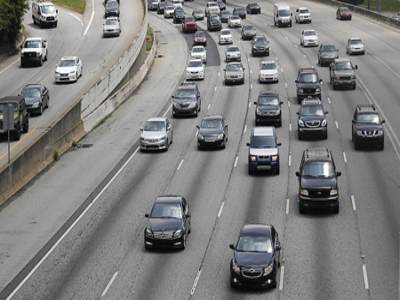

In [100]:
image = Image.open("cars.png")
image=image.resize((400,300))
img_arr=np.array(image)
image

### Converting image into a grayscale

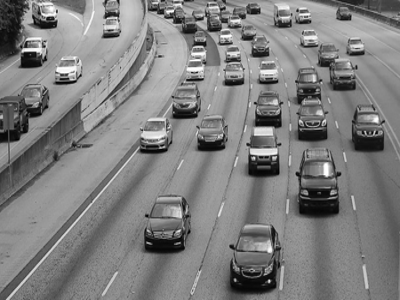

In [101]:
img_gray=cv2.cvtColor(img_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(img_gray)

#### Removing Noise from the image using gaussian blur

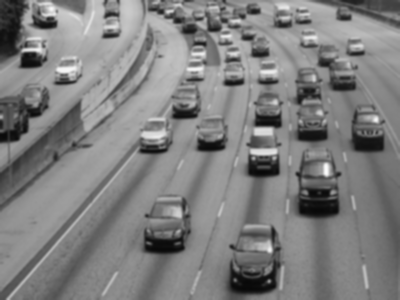

In [102]:
blur=cv2.GaussianBlur(img_gray,(5,5),0)
Image.fromarray(blur)

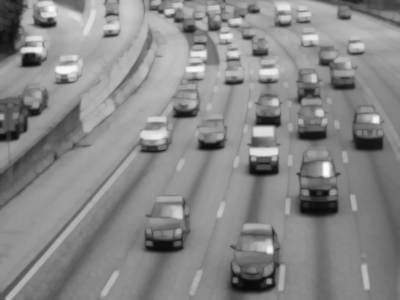

In [103]:
dialted=cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dialted)

We will dilate image
It is just opposite of erosion.
A pixel elements is '1' if atleast one pixel under the kernel is '1'. 
It increases the white region in the image or size of foreground object increases

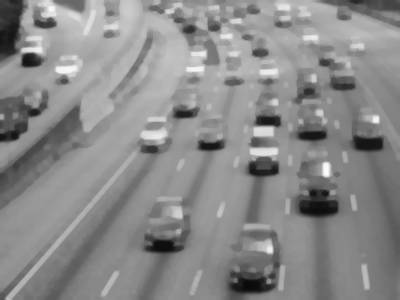

In [104]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
closing=cv2.morphologyEx(dialted,cv2.MORPH_CLOSE,kernel)
Image.fromarray(closing)

In [115]:
car_cascade=cv2.CascadeClassifier("cars.xml")
cars=car_cascade.detectMultiScale(closing,1.1,2)

Number of cars detected: 11


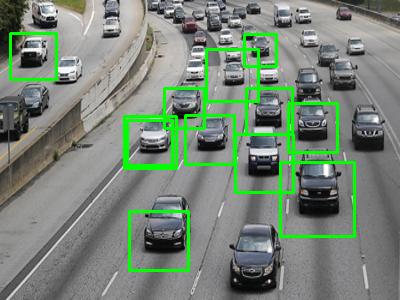

In [116]:
# car
cnt=0
for (x,y,w,h) in cars:
    cv2.rectangle(img_arr,(x,y),(x+w,y+h),(0,255,0),2)
    cnt+=1
print("Number of cars detected:",cnt)
Image.fromarray(img_arr)

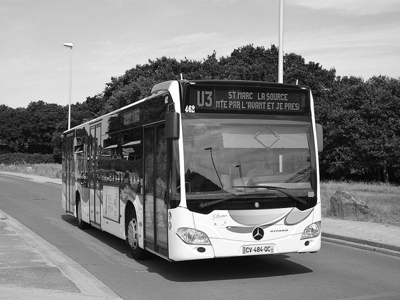

In [126]:
# bus 
img_bus=Image.open("bus.jpg")
img_bus=img_bus.resize((400,300))
img_arr2=np.array(img_bus)
img_gray2=cv2.cvtColor(img_arr2,cv2.COLOR_BGR2GRAY)
Image.fromarray(img_gray2)

In [127]:
bus_cascade=cv2.CascadeClassifier("Bus_front.xml")
buses=bus_cascade.detectMultiScale(img_gray2,1.1,1)

Number of bus detected: 11


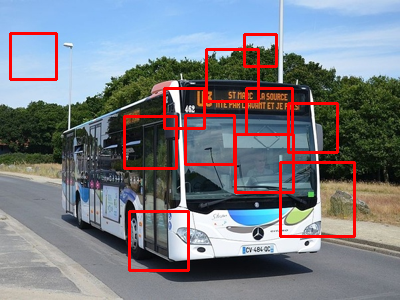

In [134]:
# Bus 
cnt=0
for (x,y,w,h) in cars:
    cv2.rectangle(img_arr2,(x,y),(x+w,y+h),(255,0,0),2)
    cnt+=1
print("Number of bus detected:",cnt)
Image.fromarray(img_arr2)

In [138]:
cascade_src='cars.xml'
video_src='video.mp4'

cap=cv2.VideoCapture(video_src)
car_cascade=cv2.CascadeClassifier(cascade_src)
video=cv2.VideoWriter('out1.avi',cv2.VideoWriter_fourcc(*'DIVX'),15.0,(450,250))

In [139]:
while True:
    ret,img=cap.read()

    if (type(img)==type(None)):
        break
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    cars=car_cascade.detectMultiScale(gray,1.1,2)
    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    video.write(img)
video.release()